In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [2]:
df = pd.read_csv('dataset/ml_datasets_1/telecom_churn_clean.csv')

In [3]:
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


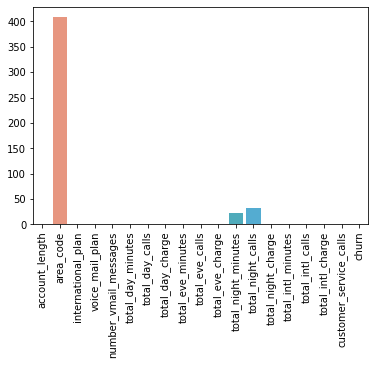

In [28]:
sns.barplot(x=df.columns, y=df.min())
plt.xticks(rotation=90)
plt.show()

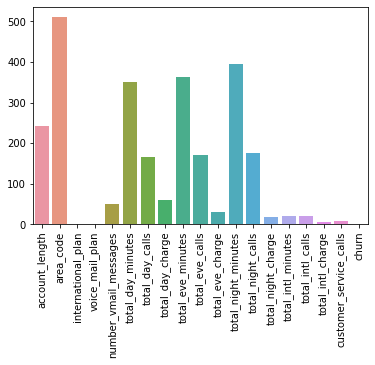

In [29]:
sns.barplot(x=df.columns, y=df.max())
plt.xticks(rotation=90)
plt.show()

# Splitting and Scaling

In [30]:
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [32]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# ANN 

In [77]:
model = Sequential()

In [78]:
df.shape

(3333, 19)

In [79]:
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [80]:
model.compile(optimizer='SGD', loss='mse')

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [82]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/500
21/21 [==============================] - 1s 19ms/step - loss: 0.3472 - val_loss: 0.3199
Epoch 2/500
21/21 [==============================] - 0s 11ms/step - loss: 0.2976 - val_loss: 0.2719
Epoch 3/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2561 - val_loss: 0.2332
Epoch 4/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2239 - val_loss: 0.2044
Epoch 5/500
21/21 [==============================] - 0s 8ms/step - loss: 0.2004 - val_loss: 0.1838
Epoch 6/500
21/21 [==============================] - 0s 8ms/step - loss: 0.1836 - val_loss: 0.1689
Epoch 7/500
21/21 [==============================] - 0s 10ms/step - loss: 0.1717 - val_loss: 0.1584
Epoch 8/500
21/21 [==============================] - 0s 10ms/step - loss: 0.1631 - val_loss: 0.1508
Epoch 9/500
21/21 [==============================] - 0s 9ms/step - loss: 0.1567 - val_loss: 0.1450
Epoch 10/500
21/21 [==============================] - 0s 11ms/step - loss: 0.1519 - val_loss: 0.1407
Epoc

In [83]:
history = model.history.history

In [84]:
history.keys()

dict_keys(['loss', 'val_loss'])

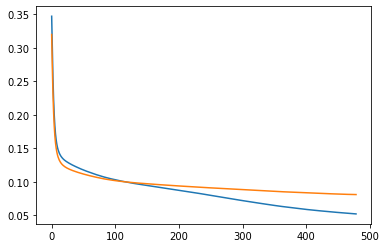

In [85]:
plt.plot(pd.DataFrame(model.history.history))
plt.show()